# Assignment - Exercise 6.4 Project Milestone1
## Week#6
## Date - July-16-2021
## Author - Ganesh Kale

#### _Data Description:_

Context -  This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.

Each news headline has a corresponding category. Categories and corresponding article have different counts. These categories are predefined the time of collecting the data and assigned them accordingly.

Problem Statement and Inspiration:

Categorize news articles based on their headlines and short descriptions?

Do news articles from different categories have different writing styles?

A classifier trained on this dataset could be used on a free text to identify the type of language being used.

#### _import required packages_

In [1]:
import numpy as np
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### _load the data set_

In [3]:
news = pd.read_json("data/News_Category_Dataset_v2.json", lines=True)

#### _display dimension and top 5 records from the data set_

In [4]:
news.shape
news.head()

(200853, 6)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


#### _display data set variable data types and Non-null count_

In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


#### _display descriptive stat summary of categorical variables_

In [9]:
news.describe()

<ipython-input-9-d644a336d14c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  news.describe()


,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://recode.ne...,,2012-12-21 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


## Exploratory Data Analysis - Data Visualization

#### _display number of news per category_

In [14]:
news.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

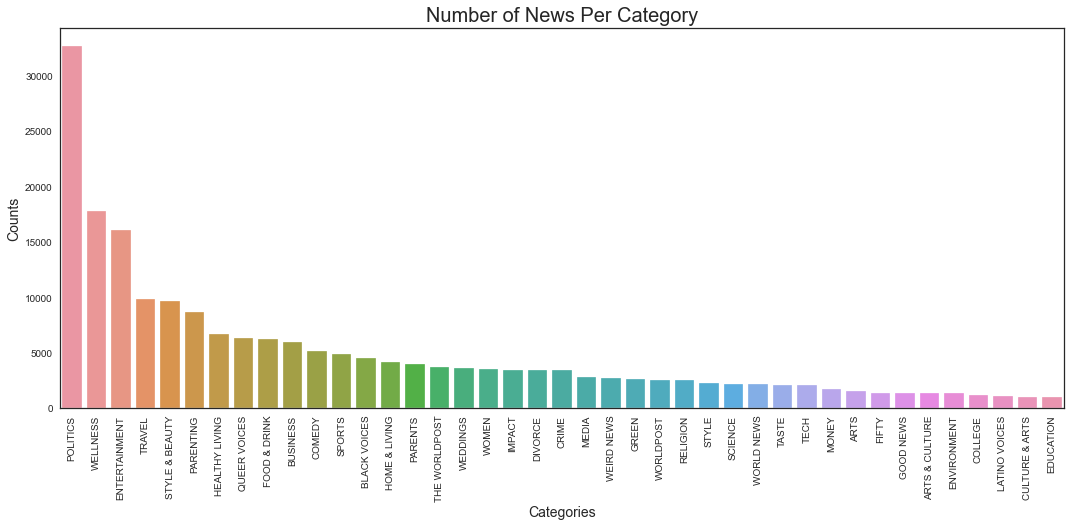

In [26]:
# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=news, x=news.category.value_counts().index,y=news.category.value_counts())
plt.xlabel('Categories',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Category',fontdict = {"fontsize":20})
plt.xticks(rotation=90);

#### _display how many news each year_

In [28]:
# create new column year by extracting year from date column

news['year'] = news['date'].apply(lambda x : x.year)

In [29]:
# display the new column details

news.year.describe()

count    200853.000000
mean       2014.611930
std           1.801049
min        2012.000000
25%        2013.000000
50%        2015.000000
75%        2016.000000
max        2018.000000
Name: year, dtype: float64

In [30]:
# counts of news each year

news.year.value_counts()

2013    34583
2014    32339
2016    32098
2015    32006
2012    31355
2017    29889
2018     8583
Name: year, dtype: int64

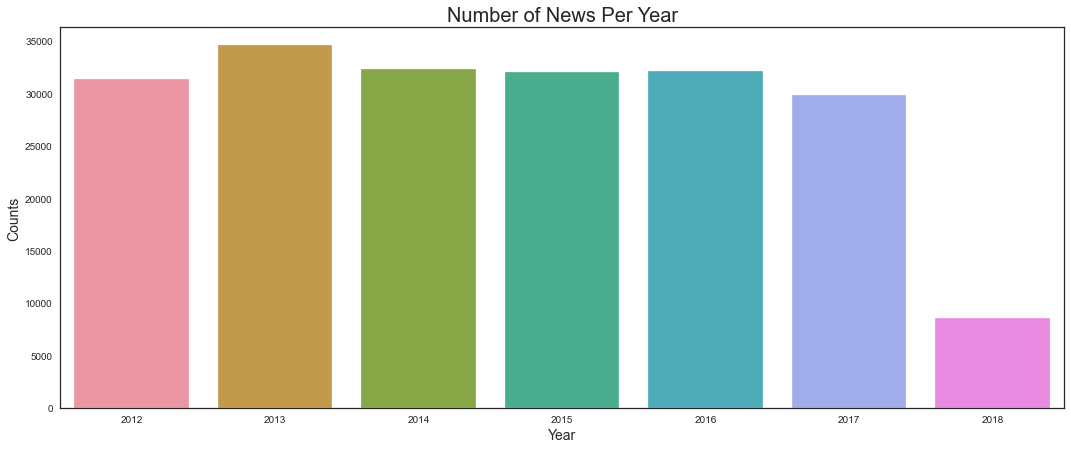

In [32]:
# bar plot to show counts of news each year

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=news, x=news.year.value_counts().index,y=news.year.value_counts())
plt.xlabel('Year',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Year',fontdict = {"fontsize":20});

#### _display distribution of words in headline and short new summary_

In [33]:
# create new column for number of words in headline and short description

news['num_words_head'] = news.headline.apply(lambda x : len(x.split()))
news['num_words_summary'] = news.short_description.apply(lambda x : len(x.split()))

In [34]:
# display the summary of new columns

news[['num_words_head','num_words_summary']].describe()

,num_words_head,num_words_summary
count,200853.000000,200853.000000
mean,9.538563,19.728289
std,3.089320,14.409189
min,0.000000,0.000000
25%,7.000000,10.000000
50%,10.000000,19.000000
75%,12.000000,24.000000
max,44.000000,243.000000


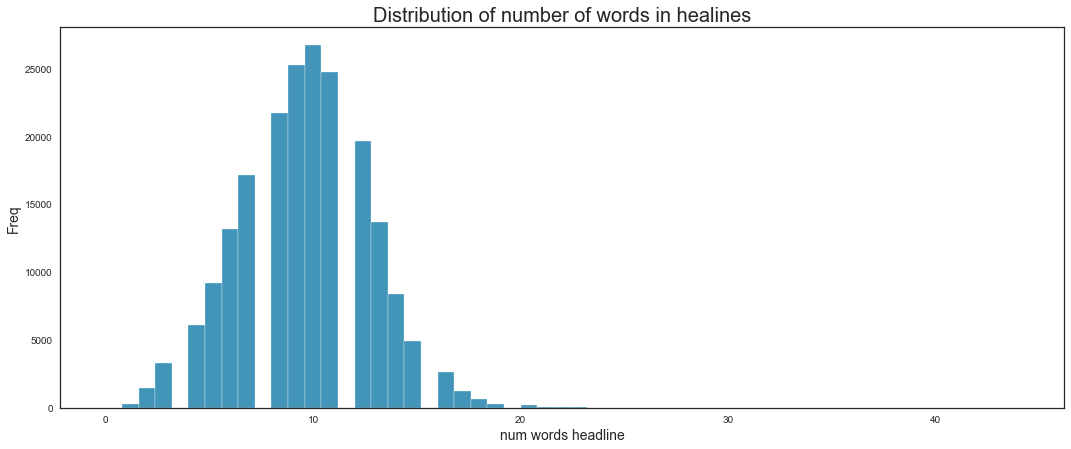

In [41]:
# Distribution of number of words in headline

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news, x='num_words_head', binwidth=0.8, bins=40,)
plt.xlabel('num words headline',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in healines',fontdict = {"fontsize":20});

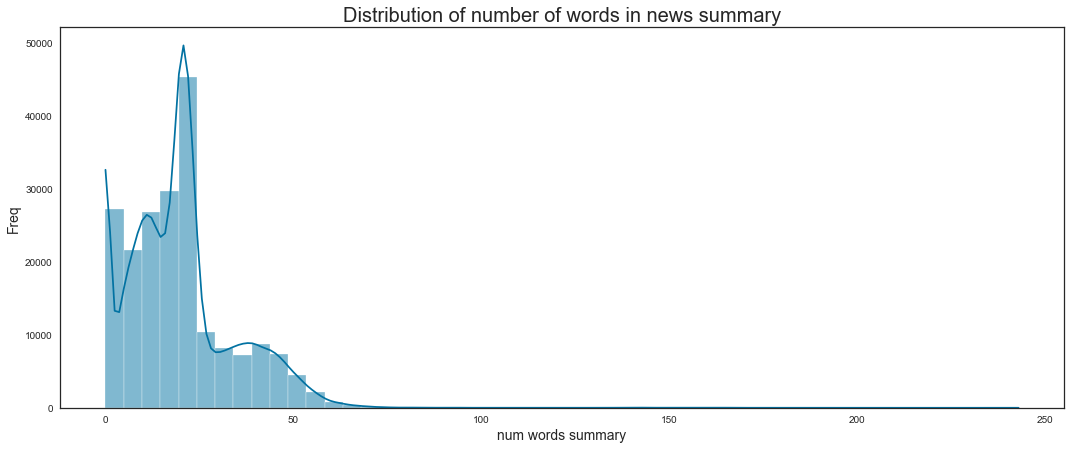

In [47]:
# Distribution of number of words in short description

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news, x='num_words_summary', bins=50, kde=True,)
plt.xlabel('num words summary',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in news summary',fontdict = {"fontsize":20});

## Insights Gained from Graphical Analysis

1. Bar Chart - Number of news per category:
This bar chart shows that the number of news in each category is not same across categories so our class in imbalance and we should use proper techniques to balance the classes/categories.
There are more Politics news than rest of the categories.

2. Bar Chart - Number of news per year:
Based on bar chart we can see that the number of news are same each year except 2018. In 2018 we have jusk around 8.5K news. This helps to understand we may skip this year and drop news in next step.

3. Histogram - Distribution of number of words in headline - 
This distribution shows that it has some outliers with word count more than 20,once that headlines are removed then distribution will be normal distribution.

4. Histogram - Distribution of number of words in short description - 
Based on this hostogram we can see that the distribution isn skewed and outliers exist. We need to remove the outliers with word count more than 50.

## Next Steps:

1. Check the weightage of classes/categories, merge some classes
2. Balance the weightage - using SMOTE or sklearn class_weight
3. create new columns - month, days
4. Feature Selection - Remove unwanted features
5. Cleaning news headlines and short descriptions - 
   - remove white spaces, punctuations, stop words, blanks, duplicates, filling missing values etc
6. Tokenization, lemmatization/stemming
7. compare headlines and short descriptions for similarity using different models
8. Perform model evaluation
9. Predict the result
10. conclusion

## END